<ipython-input-1-0e62e307d546>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2000-01-01', periods=100, freq='M')


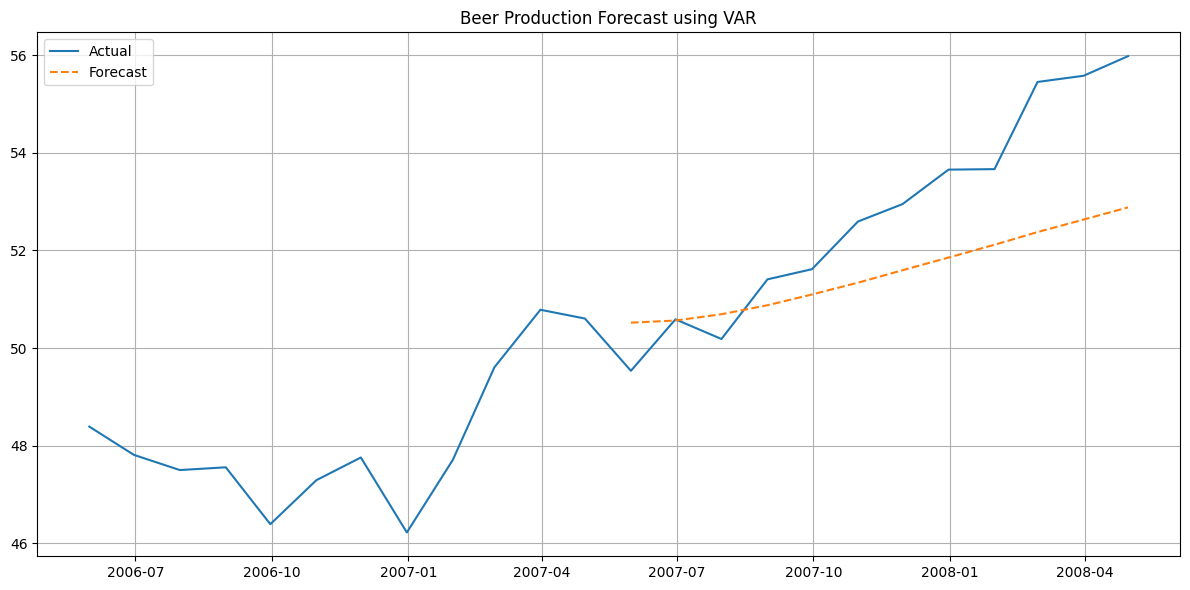

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# Example: Synthetic multivariate dataset
np.random.seed(0)
dates = pd.date_range(start='2000-01-01', periods=100, freq='M')
beer = np.cumsum(np.random.normal(0, 1, 100)) + 50
temp = np.cumsum(np.random.normal(0, 1, 100)) + 20
rain = np.cumsum(np.random.normal(0, 1, 100)) + 100

df = pd.DataFrame({'Beer_Production': beer, 'Temperature': temp, 'Rainfall': rain}, index=dates)

# Normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, index=df.index, columns=df.columns)

# Split into train/test
train = df_scaled[:-12]
test = df_scaled[-12:]

# Fit VAR model
model = VAR(train)
results = model.fit(maxlags=15, ic='aic')

# Forecast
forecast = results.forecast(train.values, steps=12)
forecast_df = pd.DataFrame(forecast, index=test.index, columns=df.columns)

# Inverse transform
forecast_inv = scaler.inverse_transform(forecast_df)
forecast_final = pd.DataFrame(forecast_inv, index=test.index, columns=df.columns)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Beer_Production'][-24:], label='Actual')
plt.plot(forecast_final['Beer_Production'], label='Forecast', linestyle='--')
plt.title('Beer Production Forecast using VAR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()